# For Keras-OCR

In [0]:
# Please install requirements for keras-OCR from https://github.com/faustomorales/keras-ocr
!pip install keras-ocr
!pip install shapely==1.6.4

     |████████████████████████████████| 174kB 2.8MB/s 
     |████████████████████████████████| 9.5MB 8.7MB/s 
     |████████████████████████████████| 798kB 36.2MB/s 
     |████████████████████████████████| 133kB 35.0MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.3-cp36-none-any.whl size=148551 sha256=92ba49e70601e46f084a6dcf55d483bb5a6409065d3eb791789d6dfa08005654
  Stored in directory: /root/.cache/pip/wheels/d2/da/6f/1752a00cfc486acbf010dad62ae45cb7013cf271bfd62635f5
  Created wheel for validators: filename=validators-0.15.0-cp36-none-any.whl size=18371 sha256=bc3c96572dd05c9efe30f3d00d9950b6dfaebcc24d4f0465c1986dadbbed7767
  Stored in directory: /root/.cache/pip/wheels/56/48/64/66c29f8eaf756b780549db047057e1563dfd2d2ce8e3d316c1
Successfully built keras-ocr validators
     |████████████████████████████████| 1.5MB 2.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: S

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


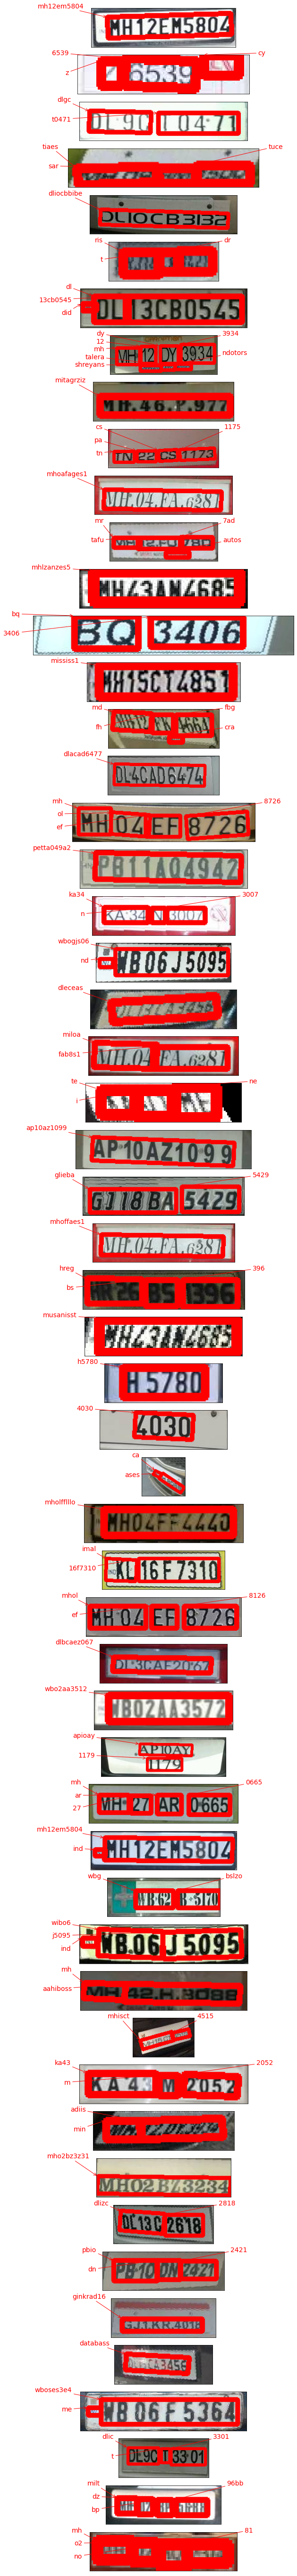

In [0]:

import matplotlib.pyplot as plt
% matplotlib inline

import keras_ocr
import os

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

# Get a set of three example images
input_folder ="sample_plates" 
f = os.listdir(input_folder)
for i in range(0,len(f)):
  f[i]=input_folder+"//"+f[i]

images = [
    keras_ocr.tools.read(url) for url in f
]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(100, 100))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

# For Google-Drive API OCR

In [0]:
# ! zip -r sample_plates.zip sample_plates

from __future__ import print_function
import httplib2
import os
import io

from googleapiclient import discovery
from oauth2client import client
from oauth2client import tools
from oauth2client.file import Storage
from googleapiclient.http import MediaFileUpload, MediaIoBaseDownload
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image

# try:
#     import argparse
#     flags = argparse.ArgumentParser(parents=[tools.argparser]).parse_args()
# except ImportError:
#     flags = None

# If modifying these scopes, delete your previously saved credentials
# at ~/.credentials/drive-python-quickstart.json
SCOPES = 'https://www.googleapis.com/auth/drive'
CLIENT_SECRET_FILE = 'credentials.json'
APPLICATION_NAME = 'Drive API Python Quickstart'


def get_credentials():
    """Gets valid user credentials from storage.

    If nothing has been stored, or if the stored credentials are invalid,
    the OAuth2 flow is completed to obtain the new credentials.

    Returns:
        Credentials, the obtained credential.
    """
    credential_path = os.path.join("./", 'drive-python-quickstart.json')
    store = Storage(credential_path)
    credentials = store.get()
    if not credentials or credentials.invalid:
        flow = client.flow_from_clientsecrets(CLIENT_SECRET_FILE, SCOPES)
        flow.user_agent = APPLICATION_NAME
        if flags:
            credentials = tools.run_flow(flow, store, flags)
        else:  # Needed only for compatibility with Python 2.6
            credentials = tools.run(flow, store)
        print('Storing credentials to ' + credential_path)
    return credentials


def main():
    credentials = get_credentials()
    http = credentials.authorize(httplib2.Http())
    service = discovery.build('drive', 'v3', http=http)
    input_folder ="sample_plates" 
    files = os.listdir(input_folder)
    for file in files:

        imgfile = input_folder+"//"+file  # Image with texts (png, jpg, bmp, gif, pdf)
        txtfile = 'output.txt'  # Text file outputted by OCR
        img = cv2.imread(imgfile)
        img = cv2.resize(img,(250,85),interpolation = cv2.INTER_AREA)
        cv2.imwrite(imgfile,img)
        print(imgfile)
        img = Image.open(imgfile)
        plt.imshow(img)
        plt.show()

        mime = 'application/vnd.google-apps.document'
        res = service.files().create(
            body={
                'name': imgfile,
                'mimeType': mime
            },
            media_body=MediaFileUpload(imgfile, mimetype=mime, resumable=True)
        ).execute()

        downloader = MediaIoBaseDownload(
            io.FileIO(txtfile, 'wb'),
            service.files().export_media(fileId=res['id'], mimeType="text/plain")
        )
        done = False
        while done is False:
            status, done = downloader.next_chunk()

        service.files().delete(fileId=res['id']).execute()
        print("Done.")
        f = open("output.txt",encoding="utf-8")
        k = f.readlines()
        try:
          print(k[2])
        except:
          pass
        print("\n")
        f.close()
        

if __name__ == '__main__':
    main()

Output hidden; open in https://colab.research.google.com to view.